In [3]:
#%matplotlib inline
import json
import numpy as np
import scipy as sp
import datetime
#import matplotlib.pyplot as plt
import operator
import os
import pandas as pd

## One single Call

In [2]:
import sys

mod_path = '/Users/Simo//Documents/energyanalytics/energyanalytics/disaggregation'
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
    
mod_path = '/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation'
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
    
from bayesian_cp_detect import bayesian_cp_3 as bcp
from bayesian_cp_detect import cp_detect
# make sure that the code is loaded to the lastest version
reload(bcp)

import string
import copy
#from datadef import wdayformat

def wdayformat(tm_wday):
    if tm_wday==1:
        strwday='Mon'
    elif tm_wday==2:
        strwday='Tue'
    elif tm_wday==3:
        strwday='Wed'
    elif tm_wday==4:
        strwday='Thu'
    elif tm_wday==5:
        strwday='Fri'
    elif tm_wday==6:
        strwday='Sat'
    elif tm_wday==7:
        strwday='Sun'            
    return strwday

def readfile(f,Col): #read .csv files
    data=[]
    time=[]
    #head=''
    lines = f.readlines()
    #label=[]
    #head+=lines[0]
    for line in lines[1:]:
        line=line.strip('\n')
        line=line.split(',')
        tmp_time=float(line[0])
        tmp_data=0
        for i in range(len(Col)):
            tmp_data+=float(line[Col[i]])
        data.append(tmp_data),
        time.append(tmp_time),
    f.close()
    return (time,data)

filename='/Users/Simo/Desktop/equota/disaggrREDD/house1_output15s'
filext='.dat'
f_input = file(filename+filext,'r')
AppNo=[3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20] #Choose App#
period=1440
N=1
(t_all,y_all)=np.array(readfile(f_input,[i-2 for i in AppNo]))
t=np.array([i+1 for i in range(period)])
y=y_all[N*period:(N+1)*period]

def rel_change(y):
    """
    return relative change comparing to the closer neighbouring points
    """
    return np.min([np.abs(y[1] - y[0]), np.abs(y[1] - y[2])]) / float(y[1])

def rel_change_filter_0819_3(t, data_input, thre=.2):
    """
    filter data based on relative change
    data points in data_input that below or above both neighbouring points
    and have relative change above thre will be set as the average of neighbouring data.
    """
    thre_2 = thre/(1-thre)
    id_filter = [i for i in range(1, len(data_input)-1) 
     if (data_input[i]>data_input[i-1] and data_input[i]>data_input[i+1] and rel_change(data_input[i-1:i+2])>thre) or
                 (data_input[i]<data_input[i-1] and data_input[i]<data_input[i+1] and rel_change(data_input[i-1:i+2])>thre_2)
    ]
    data_input_2 = [(data_input[i-1]+data_input[i+1])/2 if (i in id_filter) else dat for i, dat in enumerate(data_input) ]
    return t, data_input_2

def initial_disaggregate(t_all,y_all,num_day,period = 1440):
    
    #date_current = date_start
    day = 0
    all_dat_seg = []
    while day < num_day:
        #print 'reading: ', date_current

        #t, y = read_dat_0819(date_current, 0, 23, '../new_data/IHG')
        t=np.array([i+1 for i in range(period)])
        y=y_all[(day)*period:(day+1)*period]
        t_2, y_2 = rel_change_filter_0819_3(t,y)
        mu_list_list, sigma_list_list, prob_r_list_list, r_list_list = cp_detect.bayesian_change_point_4(y_2, r_blur=30)
        changepoint, changepoint_p = cp_detect.get_change_point(prob_r_list_list)
        changepoint.append(len(t_2)-1)

        if len(changepoint)>1:
            dat_seg = [[y[cp_start:cp_end], y[cp_start-3:cp_start]] for cp_start, cp_end in zip(changepoint[:-1], changepoint[1:])]
        else:
            dat_seg = []
        all_dat_seg.extend(dat_seg)

        #date_current+=datetime.timedelta(1)
        day+=1
        
    return all_dat_seg


day = 65
t=np.array([i+1 for i in range(period)])
y=y_all[(day)*period:(day+1)*period]
t_2, y_2 = rel_change_filter_0819_3(t,y)
mu_list_list, sigma_list_list, prob_r_list_list, r_list_list = cp_detect.bayesian_change_point_4(y_2, r_blur=30)
changepoint, changepoint_p = cp_detect.get_change_point(prob_r_list_list)
changepoint.append(len(t_2)-1)
def plot_24h_data(t, raw_data,cp_list):
    fig, axes = plt.subplots(nrows=4, figsize=[18, 10])
    
    for i, ax in enumerate(axes):
        #ax.plot(t, data, 'r-', markersize=3, linewidth=1, label='smooth')
        ax.plot(t, raw_data, 'k.', markersize=3, label='raw')
        
        for cp in cp_list:
            ax.plot([t[cp], t[cp]], [0, 3000], 'k-', linewidth=1)
        ax.set_ylabel('power')
        ax.set_xlim([0+i*360,360+i*360])
    ax.set_xlabel('time/h')
    plt.legend()
    
plot_24h_data(t_2,y_2,changepoint)




all_seg_april = initial_disaggregate(t_all,y_all,500)
all_seg_april_normalized = [np.array(x[0])-np.mean(x[1]) for x in all_seg_april if len(x[1])==3]
all_seg_april_normalized = [x for x in all_seg_april_normalized if len(x)>0]
all_positive_seg_april_normalized = [x for x in all_seg_april_normalized if x.min()>0]


NameError: name 'np' is not defined

## 1. Set up disaggregation algorithm options

In [4]:
import sys

mod_path = '/Users/Simo//Documents/energyanalytics/energyanalytics/disaggregation'
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
    
mod_path = '/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation'
if not (mod_path in sys.path):
    sys.path.insert(0, mod_path)
    
from bayesian_cp_detect import bayesian_cp_3 as bcp
from bayesian_cp_detect import cp_detect
# make sure that the code is loaded to the lastest version
reload(bcp)

<module 'bayesian_cp_detect.bayesian_cp_3' from '/Users/Simo/Documents/EquotaCode/Disaggregation/disaggregation/energyanalytics/source/disaggregation/bayesian_cp_detect/bayesian_cp_3.pyc'>

## Read File


In [5]:
import string
import copy
#from datadef import wdayformat

def wdayformat(tm_wday):
    if tm_wday==1:
        strwday='Mon'
    elif tm_wday==2:
        strwday='Tue'
    elif tm_wday==3:
        strwday='Wed'
    elif tm_wday==4:
        strwday='Thu'
    elif tm_wday==5:
        strwday='Fri'
    elif tm_wday==6:
        strwday='Sat'
    elif tm_wday==7:
        strwday='Sun'            
    return strwday

def readfile(f,Col): #read .csv files
    data=[]
    time=[]
    #head=''
    lines = f.readlines()
    #label=[]
    #head+=lines[0]
    for line in lines[1:]:
        line=line.strip('\n')
        line=line.split(',')
        tmp_time=float(line[0])
        tmp_data=0
        for i in range(len(Col)):
            tmp_data+=float(line[Col[i]])
        data.append(tmp_data),
        time.append(tmp_time),
    f.close()
    return (time,data)

In [6]:
filename='/Users/Simo/Desktop/equota/disaggrREDD/house1_output15s'
filext='.dat'
f_input = file(filename+filext,'r')
AppNo=[3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20] #Choose App#
period=1440
N=1
(t_all,y_all)=np.array(readfile(f_input,[i-2 for i in AppNo]))
t=np.array([i+1 for i in range(period)])
y=y_all[N*period:(N+1)*period]

def rel_change(y):
    """
    return relative change comparing to the closer neighbouring points
    """
    return np.min([np.abs(y[1] - y[0]), np.abs(y[1] - y[2])]) / float(y[1])

def rel_change_filter_0819_3(t, data_input, thre=.2):
    """
    filter data based on relative change
    data points in data_input that below or above both neighbouring points
    and have relative change above thre will be set as the average of neighbouring data.
    """
    thre_2 = thre/(1-thre)
    id_filter = [i for i in range(1, len(data_input)-1) 
     if (data_input[i]>data_input[i-1] and data_input[i]>data_input[i+1] and rel_change(data_input[i-1:i+2])>thre) or
                 (data_input[i]<data_input[i-1] and data_input[i]<data_input[i+1] and rel_change(data_input[i-1:i+2])>thre_2)
    ]
    data_input_2 = [(data_input[i-1]+data_input[i+1])/2 if (i in id_filter) else dat for i, dat in enumerate(data_input) ]
    return t, data_input_2

In [7]:
def initial_disaggregate(t_all,y_all,num_day,period = 1440):
    
    #date_current = date_start
    day = 0
    all_dat_seg = []
    while day < num_day:
        #print 'reading: ', date_current

        #t, y = read_dat_0819(date_current, 0, 23, '../new_data/IHG')
        t=np.array([i+1 for i in range(period)])
        y=y_all[(day)*period:(day+1)*period]
        t_2, y_2 = rel_change_filter_0819_3(t,y)
        mu_list_list, sigma_list_list, prob_r_list_list, r_list_list = cp_detect.bayesian_change_point_4(y_2, r_blur=30)
        changepoint, changepoint_p = cp_detect.get_change_point(prob_r_list_list)
        changepoint.append(len(t_2)-1)

        if len(changepoint)>1:
            dat_seg = [[y[cp_start:cp_end], y[cp_start-3:cp_start]] for cp_start, cp_end in zip(changepoint[:-1], changepoint[1:])]
        else:
            dat_seg = []
        all_dat_seg.extend(dat_seg)

        #date_current+=datetime.timedelta(1)
        day+=1
        
    return all_dat_seg

In [8]:
all_seg_april = initial_disaggregate(t_all,y_all,500)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:67: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:77: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:89: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in double_scalars


In [9]:
len(t_all),len(y_all)

(149175, 149175)

In [1]:
day = 67
t=np.array([i+1 for i in range(period)])
y=y_all[(day)*period:(day+1)*period]
t_2, y_2 = rel_change_filter_0819_3(t,y)
mu_list_list, sigma_list_list, prob_r_list_list, r_list_list = cp_detect.bayesian_change_point_4(y_2, r_blur=30)
changepoint, changepoint_p = cp_detect.get_change_point(prob_r_list_list)
changepoint.append(len(t_2)-1)
def plot_24h_data(t, raw_data,cp_list):
    fig, axes = plt.subplots(nrows=4, figsize=[18, 10])
    
    for i, ax in enumerate(axes):
        #ax.plot(t, data, 'r-', markersize=3, linewidth=1, label='smooth')
        ax.plot(t, raw_data, 'k.', markersize=3, label='raw')
        
        for cp in cp_list:
            ax.plot([t[cp], t[cp]], [0, 3000], 'k-', linewidth=1)
        ax.set_ylabel('power')
        ax.set_xlim([0+i*360,360+i*360])
    ax.set_xlabel('time/h')
    plt.legend()
    
plot_24h_data(t_2,y_2,changepoint)

NameError: name 'np' is not defined

In [20]:
all_seg_april_normalized = [np.array(x[0])-np.mean(x[1]) for x in all_seg_april if len(x[1])==3]
all_seg_april_normalized = [x for x in all_seg_april_normalized if len(x)>0]
all_positive_seg_april_normalized = [x for x in all_seg_april_normalized if x.min()>0]

In [24]:
#all_seg_april_normalized = [x for x in all_positive_seg_april_normalized if x.mean()<500]
all_seg_april_normalized = [x for x in all_positive_seg_april_normalized if x.mean()>500]

(-600, 4000)

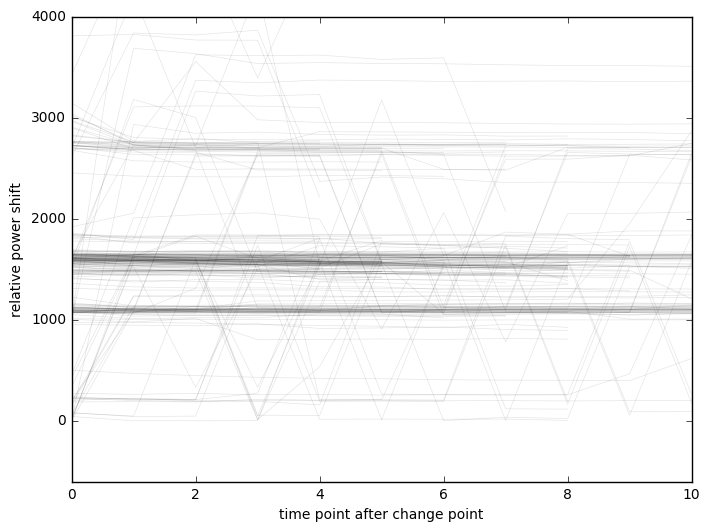

In [25]:
plt.figure(figsize=[8, 6])

for x in all_seg_april_normalized:
    plt.plot(x, 'k-', linewidth=.5, alpha=.1)

plt.xlabel('time point after change point')
plt.ylabel('relative power shift')
plt.xlim([0, 10])
plt.ylim([-600, 4000])

## Cluster

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import operator
import seaborn as sns

def extract_first_n(data_list, n):
    return [t[:n] for t in data_list if len(t)>=n]


# integrated functions:
def integrated_clustering(t_all,y_all,num_of_days=500,period = 1440,trim=10,min_n_clusters = 4, max_n_clusters=10,hierarchical=0):
    all_seg_april = initial_disaggregate(t_all,y_all,num_of_days,period = period)
    all_seg_april_normalized = [np.array(x[0])-np.mean(x[1]) for x in all_seg_april if len(x[1])==3]
    all_seg_april_normalized = [x for x in all_seg_april_normalized if len(x)>0]
    if hierarchical == 0:
        pass
    elif hierarchical ==1:
        all_seg_april_normalized = [x for x in all_seg_april_normalized if x.mean()>1000]
    else:
        all_seg_april_normalized = [x for x in all_seg_april_normalized if x.mean()<1000]
    
    all_positive_seg_april_normalized = [x for x in all_seg_april_normalized if x.min()>0]
    
    
    all_seg_april_normalized_trim50 = extract_first_n(all_positive_seg_april_normalized, trim)
    cluster_average = []
    
    # find optimal clustering number using silhouette score
    
    optimal_dict = {}
    
    for n_clusters in range(min_n_clusters,max_n_clusters):
        
        y_pred = KMeans(n_clusters=n_clusters).fit_predict(all_seg_april_normalized_trim50)

        cluster_average = []
        for i_cluster in range(n_clusters):
            cluster_average.append(
                np.mean([np.mean(x) for i, x in enumerate(all_seg_april_normalized_trim50) if y_pred[i]==i_cluster])
            ) 

        # sihouette score
        cluster_labels = y_pred
        sample_silhouette_values = silhouette_samples(all_seg_april_normalized_trim50, cluster_labels)
        
        silhouette_avg = silhouette_score(pd.DataFrame(all_seg_april_normalized_trim50), cluster_labels)

        optimal_dict[n_clusters] = silhouette_avg +(sample_silhouette_values.min()+sample_silhouette_values.max())/2
    
    
    n_clusters = max(optimal_dict.iteritems(), key=operator.itemgetter(1))[0]

    print n_clusters
    
    y_pred = KMeans(n_clusters=n_clusters).fit_predict(all_seg_april_normalized_trim50)

    cluster_average = []
    
    for i_cluster in range(n_clusters):
        cluster_average.append(
            np.mean([np.mean(x) for i, x in enumerate(all_seg_april_normalized_trim50) if y_pred[i]==i_cluster])
        ) 
    cluster_average_rank = np.argsort(cluster_average)[::-1]
    rank_map = {cluster_average_rank[i_cluster]:i_cluster for i_cluster in range(n_clusters)} # old index:new index

    y_pred_old = y_pred
    y_pred = [rank_map[x] for x in y_pred]
    all_seg_per_cluster = [[] for i in range(n_clusters) ]
    for i_seg in range(len(all_seg_april_normalized_trim50)):
        all_seg_per_cluster[y_pred[i_seg]].append(all_seg_april_normalized_trim50[i_seg])
        
    cluster_mean = [[] for i in range(n_clusters) ]
    cluster_std = [[] for i in range(n_clusters) ]
    for i_cluster in range(n_clusters):
        cluster_mean[ i_cluster ] = np.mean(np.array(all_seg_per_cluster[i_cluster]), axis=0)
        cluster_std[ i_cluster ] = np.std(np.array(all_seg_per_cluster[i_cluster]), axis=0)
    
    
    
    
    #cluster_mean_2 = cluster_mean[5:6]
    
    return cluster_mean,cluster_std,n_clusters,all_seg_per_cluster

def plot_cluster_result(cluster_mean,cluster_std,n_clusters,all_seg_per_cluster):    
    color_list = sns.color_palette("hls", n_clusters)

    fig, ax = plt.subplots(nrows=5,ncols=4,figsize=[20,12]);
    ax = ax.flatten()

    for i_cluster in range(n_clusters):
        ax_current = ax[i_cluster]

        for seg in all_seg_per_cluster[i_cluster]:
            ax_current.plot(seg, '-', linewidth=1, alpha=.3, color=color_list[i_cluster])
        ax_current.set_xlim([0, 10])
        ax_current.set_ylim([-500, 4000])
        ax_current.plot([0,50], [0,0], 'k--')    
        ax_current.plot(cluster_mean[i_cluster], color=color_list[i_cluster])
        ax_current.fill_between(range(10)
                                , cluster_mean[i_cluster]-cluster_std[i_cluster]
                                , cluster_mean[i_cluster]+cluster_std[i_cluster]
                                , color=color_list[i_cluster], alpha=.8)
def n_dimension_identity_matrix(cluster_mean_2):
    to_return_list  = []
    for i in range(1,len(cluster_mean_2)+1):
        to_return_list.append([0 if j!=i else 1 for j in range(1,len(cluster_mean_2)+1)])
    return to_return_list

In [47]:
# run before dissagregate
cluster_mean_2 = []
cluster_mean_2.append(cluster_mean[5])
cluster_mean_2.append(cluster_mean[8])
cluster_mean_2.append(cluster_mean[14])
cluster_mean_2.append(cluster_mean[16])
cluster_mean_2.append(cluster_mean[12])


In [48]:
cluster_mean_2

[array([ 2853.87037037,  2724.53703704,  2807.09259259,  2741.14814815,
         2752.59259259,  2754.25925926,  2727.98148148,  2725.42592593,
         2748.81481481,  2746.64814815]),
 array([ 1524.51893939,  1637.99621212,  1641.0530303 ,  1569.65530303,
         1603.8030303 ,  1612.5530303 ,  1625.28030303,  1530.13257576,
         1557.47348485,  1553.79166667]),
 array([ 524.42063492,  446.73015873,  416.20634921,  400.20634921,
         460.53968254,  380.49206349,  521.15873016,  376.11111111,
         372.11111111,  515.49206349]),
 array([ 208.71669627,  201.59769094,  190.1669627 ,  188.87211368,
         187.12255773,  186.17761989,  185.35168739,  184.31616341,
         184.75754885,  184.92095915]),
 array([  990.84285714,  1126.92857143,  1124.11428571,  1128.9       ,
         1125.11428571,  1127.48571429,  1127.47142857,  1128.05714286,
         1128.77142857,  1147.38571429])]

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:55: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/_methods.py:77: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


17


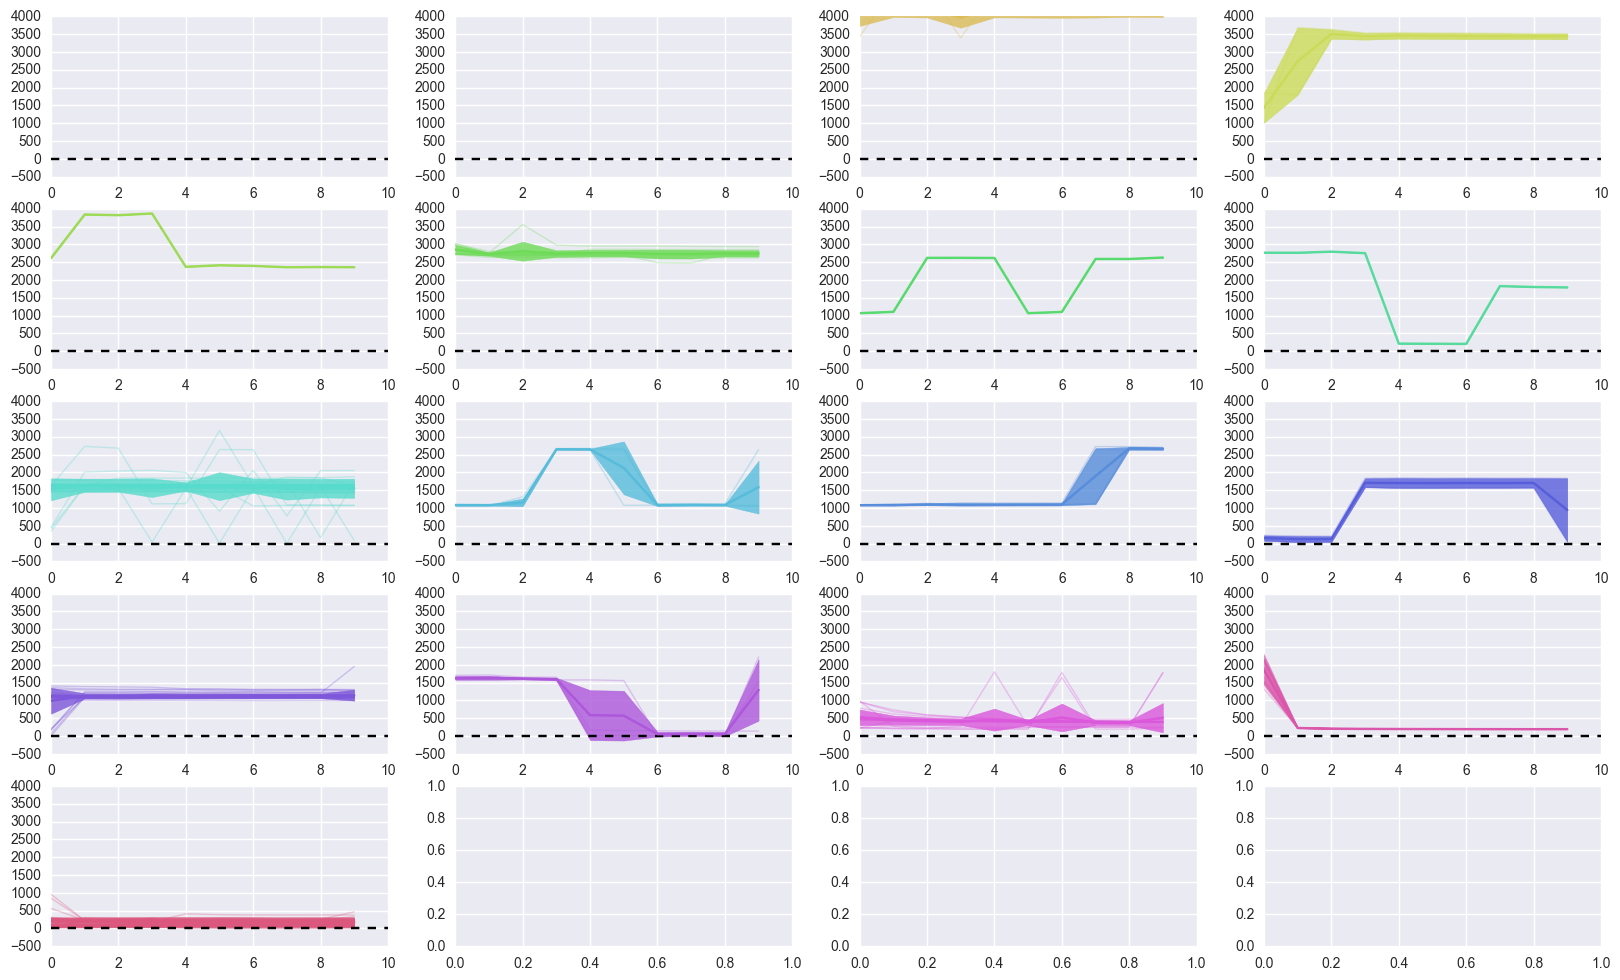

In [12]:
cluster_mean,cluster_std,n_clusters,all_seg_per_cluster = integrated_clustering(t_all,y_all,num_of_days=500,period = 1440,trim=10,min_n_clusters = 17, max_n_clusters=18)
plot_cluster_result(cluster_mean,cluster_std,n_clusters,all_seg_per_cluster)


In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
color_list = sns.color_palette("hls", 8)
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# define a function that trim the first n data points, or discard if len is less

def extract_first_n(data_list, n):
    return [t[:n] for t in data_list if len(t)>=n]
all_seg_april_normalized_trim50 = extract_first_n(all_seg_april_normalized, 10)

print '# segs before trimming: ', len(all_seg_april_normalized)
print '# segs after trimming: ', len(all_seg_april_normalized_trim50)

n_clusters=10
y_pred = KMeans(n_clusters=n_clusters).fit_predict(all_seg_april_normalized_trim50)

cluster_average = []
for i_cluster in range(n_clusters):
    cluster_average.append(
        np.mean([np.mean(x) for i, x in enumerate(all_seg_april_normalized_trim50) if y_pred[i]==i_cluster])
    ) 

cluster_average_rank = np.argsort(cluster_average)[::-1]
rank_map = {cluster_average_rank[i_cluster]:i_cluster for i_cluster in range(n_clusters)} # old index:new index

y_pred_old = y_pred
y_pred = [rank_map[x] for x in y_pred]

In [99]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
for n_clusters in range(4,10):
    y_pred = KMeans(n_clusters=n_clusters).fit_predict(all_seg_april_normalized_trim50)

    cluster_average = []
    for i_cluster in range(n_clusters):
        cluster_average.append(
            np.mean([np.mean(x) for i, x in enumerate(all_seg_april_normalized_trim50) if y_pred[i]==i_cluster])
        ) 

    # sihouette score
    cluster_labels = y_pred
    #sample_silhouette_values = silhouette_samples(all_seg_april_normalized_trim50, cluster_labels)
    #print sample_silhouette_values.min()
    silhouette_avg = silhouette_score(pd.DataFrame(all_seg_april_normalized_trim50), cluster_labels)

    #print  silhouette_avg + sample_silhouette_values.min()

cluster_average_rank = np.argsort(cluster_average)[::-1]
rank_map = {cluster_average_rank[i_cluster]:i_cluster for i_cluster in range(n_clusters)} # old index:new index

y_pred_old = y_pred
y_pred = [rank_map[x] for x in y_pred]

In [100]:
all_seg_per_cluster = [[] for i in range(n_clusters) ]
for i_seg in range(len(all_seg_april_normalized_trim50)):
    all_seg_per_cluster[y_pred[i_seg]].append(all_seg_april_normalized_trim50[i_seg])

In [101]:
cluster_mean = [[] for i in range(n_clusters) ]
cluster_std = [[] for i in range(n_clusters) ]
for i_cluster in range(n_clusters):
    cluster_mean[ i_cluster ] = np.mean(np.array(all_seg_per_cluster[i_cluster]), axis=0)
    cluster_std[ i_cluster ] = np.std(np.array(all_seg_per_cluster[i_cluster]), axis=0)

[{(1, 1, 1, 0, 0): 0.0, (0, 0, -1, 0, -1): 0.0, (1, 0, 1, 1, 0): 0.0, (0, 0, 0, -1, 0): 0.0, (1, 1, 0, 1, 1): 0.0, (0, -1, -1, -1, -1): 0.0, (0, -1, 0, -1, 0): 0.0, (0, 0, 1, 1, 1): 0.0, (-1, 0, -1, -1, 0): 0.0, (-1, -1, -1, 0, -1): 0.0, (1, 0, 0, 0, 0): 0.0, (0, -1, 0, 0, -1): 0.0, (0, 0, 0, 0, 1): 0.0, (1, 0, 1, 0, 0): 0.0, (0, 0, -1, 0, 0): 0.0, (1, 1, 1, 1, 0): 0.0, (0, 1, 0, 1, 1): 0.0, (1, 0, 0, 1, 0): 0.0, (0, 0, -1, -1, -1): 0.0, (-1, -1, -1, 0, 0): 0.0, (-1, -1, -1, -1, 0): 0.0, (0, 0, 1, 0, 0): 4.620168596021069e-60, (-1, 0, 0, 0, 0): 0.0, (-1, -1, 0, -1, -1): 0.0, (0, 1, 1, 1, 0): 0.0, (-1, 0, -1, 0, -1): 0.0, (0, 1, 0, 0, 0): 0.0, (1, 1, 1, 0, 1): 0.0, (0, 1, 0, 1, 0): 0.0, (1, 0, 1, 1, 1): 0.0, (0, 0, 0, 0, -1): 0.0, (-1, 0, 0, -1, -1): 0.0, (1, 1, 0, 1, 0): 0.0, (-1, 0, -1, 0, 0): 0.0, (1, 1, 0, 0, 0): 0.0, (0, -1, -1, -1, 0): 0.0, (-1, -1, -1, -1, -1): 0.0, (-1, 0, 0, 0, -1): 0.0, (1, 0, 1, 0, 1): 0.0, (0, 0, 0, 0, 0): 0.0, (0, 1, 1, 0, 0): 0.0, (-1, -1, 0, -1, 0): 0.0, 

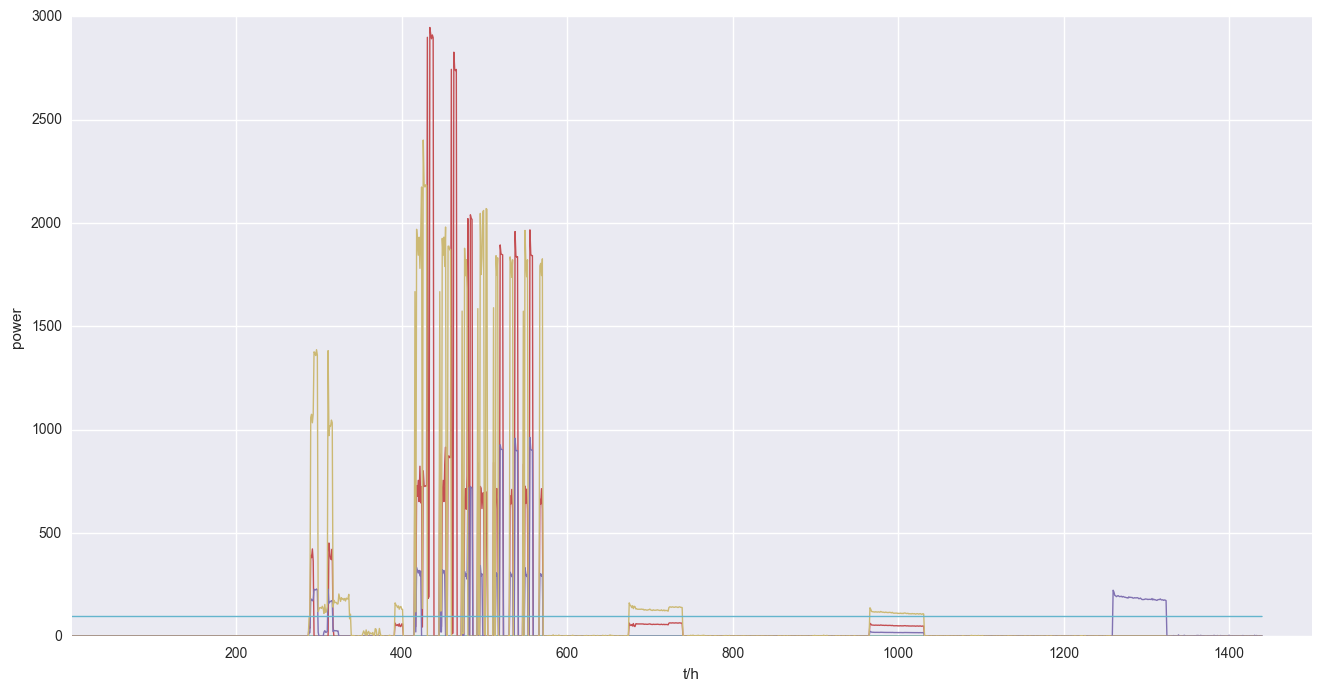

In [77]:
reload(bcp)
#cluster_mean_2 = cluster_mean
predicted_profile = integrated_dissagregate(y_all,1440,cluster_mean_2,day = 70,n_equipment_type = len(cluster_mean_2),n_equipment=[2 for i in range(1,len(cluster_mean_2)+1)],obs_mat=n_dimension_identity_matrix(cluster_mean_2),power_usage = [i.mean() for i in cluster_mean_2])  
plot_dissagregation(predicted_profile,np.array([i+1 for i in range(period)]))


In [74]:
# integrated dissagregation
#cluster_mean_2 = []
#cluster_mean_2.append(np.array([80 for i in range(20)]))
#cluster_mean_2.append(np.array([50 for i in range(20)]))
#cluster_mean_2.append(np.array([1550 for i in range(20)]))
#cluster_mean_2.append(np.array([1000 for i in range(20)]))
#cluster_mean_2.append(np.array([200 for i in range(20)]))

def DP_state_generation(N):
    if N==1:
        return [[0],[1]]
    else:
        return_list = DP_state_generation(N-1)
        toreturn = []
        for i in return_list:
            #print i
            i.append(0)
            toreturn.append(copy.copy(i))
            i.pop()
            i.append(1)
            #print i
            toreturn.append(copy.copy(i))
                
        #print toreturn
        return toreturn

def generate_state_prob_list(N):
    toreturn = {}
    toreturnlist = DP_state_generation(N)
    k = 1/float(len(toreturnlist))
    for i in toreturnlist:
        toreturn[tuple(i)] = k
        
    return toreturn

def integrated_dissagregate(y_all,period,cluster_mean_2,day = 65,n_equipment_type = 4,n_equipment = [2,2,2,2],obs_mat = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]),power_usage = [0,0,0,0]):
    
    opt = bcp.set_disaggregation_option(change_shape=cluster_mean_2, 
                               init_pos_std = np.sqrt([float(200/3), float(200/3), float(400/3), float(400/3)])
                                )
    
    t=np.array([i+1 for i in range(period)])
    data=y_all[(day)*period:(day+1)*period]
    cp_list = bcp.disaggregate(data,opt)

    data_seg, n_seg, data_seg_raw_last = bcp.segment_data(data, cp_list)
    new_data_seg, new_n_seg, new_data_seg_raw_last = bcp.segment_data_new(data, cp_list)
    shape_matched = cluster_mean_2
    n_shape_matched = len(shape_matched)
    all_shape_code = bcp.shape_code_gen(n_shape_matched)
    shape_dict = bcp.combine_shape(shape_matched, all_shape_code)
    shape_prob_list = bcp.get_seg_prob(data_seg, shape_dict)
    
    new_shape_prob_list = bcp.get_seg_prob_positive(new_data_seg, shape_dict)
    
    print shape_prob_list
    
    
    
    #shape_prob_list = bcp.get_seg_prob(data_seg, shape_dict)
    
    
    
    state_prob_list = generate_state_prob_list(len(cluster_mean_2))
    
    
    #obs_mat = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
    
    for item,keys in state_prob_list.iteritems():
        state_prob_list[item] = new_shape_prob_list[0][item]
    
    #trace_list, shape_list = bcp.viterbi(shape_prob_list, new_shape_prob_list[0], data_seg, obs_mat)
    #trace_list, shape_list = viterbi_new(shape_prob_list,state_prob_list,new_shape_prob_list,data_seg,obs_mat,power_usage)
    trace_list, shape_list = viterbi_for_missing_change_point(shape_prob_list,state_prob_list,new_shape_prob_list,data_seg,obs_mat,power_usage,alpha = 10)
    
    predicted_profile = bcp.generate_predicted_profile(cp_list, shape_matched, shape_list, data, n_equipment_type, obs_mat, trace_list)
    
    return predicted_profile

def plot_dissagregation(predicted_profile,t):
    plt.figure(figsize = [16,8])
    for tmp in predicted_profile:
        plt.plot(t,tmp,linewidth = 1)
    #plt.plot(t,data,'k.',markersize = 2)

    plt.xlim([1,1500])
    plt.ylim([0,3000])
    plt.xlabel('t/h')
    plt.ylabel('power')
    
def plot_dissagregation_2(predicted_profile,t):
    plt.figure(figsize = [16,8])
    for key,tmp in predicted_profile.iteritems():
        plt.plot(t,tmp,linewidth = 1)
    #plt.plot(t,data,'k.',markersize = 2)

    plt.xlim([1,1500])
    plt.ylim([0,3000])
    plt.xlabel('t/h')
    plt.ylabel('power')


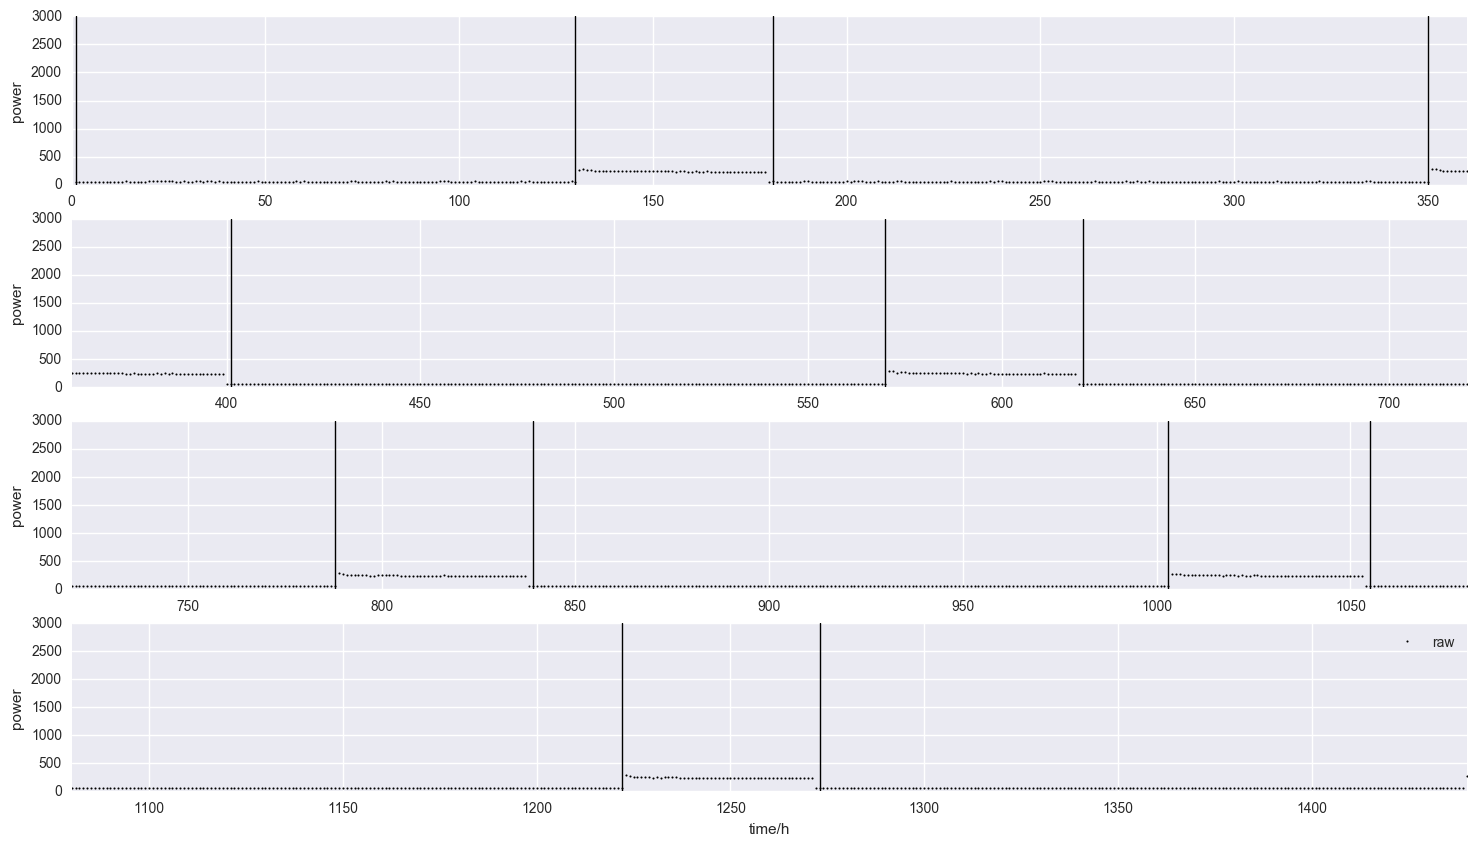

In [46]:
#cluster_mean_2 = cluster_mean[5:6]
cluster_mean_2 = []
#cluster_mean_2.append(np.array([80 for i in range(20)]))
#cluster_mean_2.append(np.array([50 for i in range(20)]))
#cluster_mean_2.append(np.array([1000 for i in range(20)]))
#cluster_mean_2.append(np.array([200 for i in range(20)]))
#opt = bcp.set_disaggregation_option(change_shape=cluster_mean_2, 
                               init_pos_std = np.sqrt([float(200/3), float(200/3), float(400/3), float(400/3)])
                                )
day = 66
t=np.array([i+1 for i in range(period)])
data=y_all[(day)*period:(day+1)*period]
cp_list = bcp.disaggregate(data,opt)
plot_24h_data(t,data,cp_list)

In [444]:
# New Viterbi 
data_seg, n_seg, data_seg_raw_last = bcp.segment_data(data, cp_list)
new_data_seg, new_n_seg, new_data_seg_raw_last = bcp.segment_data_new(data, cp_list)
shape_prob_list = bcp.get_seg_prob(data_seg, shape_dict)

new_shape_prob_list = bcp.get_seg_prob_positive(new_data_seg, shape_dict)


In [316]:
import operator
#tuple(map(operator.add, a, b))
error = 0
#init_state = tuple([0,1,0,0,0])
init_state = max(new_shape_prob_list[0].iteritems(),key = operator.itemgetter(1))[0]
power_usage = tuple([100,50,1500,2000,50])
#state = tuple(0,0,0,0,0)
for i in range(len(cp_list)-2):
    #print init_state
    print max(new_shape_prob_list[i+1].iteritems(),key = operator.itemgetter(1))[0]
    init_state = tuple(map(operator.add,init_state,max(shape_prob_list[i+1].iteritems(),key= operator.itemgetter(1))[0]))
    print init_state
    #init_state = tuple(map(operator.add,init_state,max(shape_prob_list[i+1].iteritems(),key = operator.itemgetter(1))[0]))
    #if sum(map(operator.mul,init_state,power_usage))-sum(max(new_shape_prob_list[i+1].iteritems(),key=operator.itemgetter(1))[0])<1000:
    #if tuple(map(operator.add,init_state , max(switch_shape_prob_list[i+1].iteritems(),key = operator.itemgetter(1))[0])) == max(shape_prob_list[i+1].iteritems(),key=operator.itemgetter(1))[0]:
        
    #    pass
    #else:
        
        #print "#####################"
        #print i
        #print max(shape_prob_list[i].iteritems(),key=operator.itemgetter(1))[0]
        #print max(switch_shape_prob_list[i+1].iteritems(),key = operator.itemgetter(1))[0] 
        #print max(shape_prob_list[i+1].iteritems(),key=operator.itemgetter(1))[0]
        #print "#####################"
        #error+=1
    

(1, 0, 0, 1)
(1, 0, 0, 1)
(1, 0, 0, 0)
(1, 0, 0, 0)
(1, 0, 0, 1)
(1, 0, 0, 1)
(1, 0, 0, 0)
(1, 0, 0, 0)
(1, 0, 0, 1)
(1, 0, 0, 1)
(1, 0, 0, 1)
(1, 0, 0, 2)
(0, 1, 0, 0)
(1, 0, 1, 2)
(1, 1, 0, 1)
(1, 0, 2, 2)
(0, 1, 1, 0)
(2, 0, 2, 2)
(0, 0, 1, 0)
(1, 0, 1, 1)
(1, 0, 0, 1)
(0, 0, 1, 0)
(1, 0, 0, 1)
(1, 0, 1, 0)
(0, 1, 0, 1)
(1, 1, 1, 0)
(1, 0, 0, 1)
(1, 1, 0, -1)
(1, 0, 0, 1)
(0, 1, 0, -2)
(0, 0, 0, 1)
(-1, 1, 0, -2)
(1, 0, 1, 1)
(0, 1, 1, -2)
(0, 0, 0, 1)
(-1, 1, 0, -2)
(1, 0, 0, 0)
(-2, 1, 0, -2)
(1, 0, 0, 1)
(-2, 1, 0, -1)
(1, 0, 0, 0)
(-2, 1, 0, -2)
(1, 0, 0, 1)
(-2, 1, 0, -1)
(1, 0, 0, 0)
(-2, 1, 0, -2)
(1, 0, 0, 0)
(-1, 1, 0, -2)
(1, 0, 0, 0)
(-1, 1, 0, -3)


In [317]:
data_seg, n_seg, data_seg_raw_last = bcp.segment_data(data, cp_list)

In [318]:
shape_matched = cluster_mean_2
n_shape_matched = len(shape_matched)
all_shape_code = bcp.shape_code_gen(n_shape_matched)
shape_dict = bcp.combine_shape(shape_matched, all_shape_code)
print all_shape_code
shape_prob_list = bcp.get_seg_prob(data_seg, shape_dict)

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [14]:
def DP_state_generation(N):
    if N==1:
        return [[0],[1]]
    else:
        return_list = DP_state_generation(N-1)
        toreturn = []
        for i in return_list:
            #print i
            i.append(0)
            toreturn.append(copy.copy(i))
            i.pop()
            i.append(1)
            #print i
            toreturn.append(copy.copy(i))
                
        #print toreturn
        return toreturn
DP_state_generation(10)

def generate_state_prob_list(N):
    toreturn = {}
    toreturnlist = DP_state_generation(N)
    k = 1/float(len(toreturnlist))
    for i in toreturnlist:
        toreturn[tuple(i)] = k
        
    return toreturn
generate_state_prob_list(5)

{(0, 0, 0, 0, 0): 0.03125,
 (0, 0, 0, 0, 1): 0.03125,
 (0, 0, 0, 1, 0): 0.03125,
 (0, 0, 0, 1, 1): 0.03125,
 (0, 0, 1, 0, 0): 0.03125,
 (0, 0, 1, 0, 1): 0.03125,
 (0, 0, 1, 1, 0): 0.03125,
 (0, 0, 1, 1, 1): 0.03125,
 (0, 1, 0, 0, 0): 0.03125,
 (0, 1, 0, 0, 1): 0.03125,
 (0, 1, 0, 1, 0): 0.03125,
 (0, 1, 0, 1, 1): 0.03125,
 (0, 1, 1, 0, 0): 0.03125,
 (0, 1, 1, 0, 1): 0.03125,
 (0, 1, 1, 1, 0): 0.03125,
 (0, 1, 1, 1, 1): 0.03125,
 (1, 0, 0, 0, 0): 0.03125,
 (1, 0, 0, 0, 1): 0.03125,
 (1, 0, 0, 1, 0): 0.03125,
 (1, 0, 0, 1, 1): 0.03125,
 (1, 0, 1, 0, 0): 0.03125,
 (1, 0, 1, 0, 1): 0.03125,
 (1, 0, 1, 1, 0): 0.03125,
 (1, 0, 1, 1, 1): 0.03125,
 (1, 1, 0, 0, 0): 0.03125,
 (1, 1, 0, 0, 1): 0.03125,
 (1, 1, 0, 1, 0): 0.03125,
 (1, 1, 0, 1, 1): 0.03125,
 (1, 1, 1, 0, 0): 0.03125,
 (1, 1, 1, 0, 1): 0.03125,
 (1, 1, 1, 1, 0): 0.03125,
 (1, 1, 1, 1, 1): 0.03125}

In [324]:

#state_prob_list = {(0,0,0,0,0):.05,(0,1,0,0,0):0.1,(0,0,0,0,1):0.2,(1,0,0,0,0):0.2,(0,0,1,0,0):0.1,(0,0,0,1,0):0.2,(1,1,0,0,0):0.05,(1,0,0,1,0):0.05,(1,0,0,0,1):0.05,(1,0,1,0,0):0.05,(0,0,0,1,1):0.05,(0,1,0,0,1):0.05,(0,1,1,0,0):0.05,(0,1,0,1,0):0.05,(1,1,1,0):0.02,(0,1,1,1):0.02,(1,0,1,1):0.02,(1,1,0,1):0.02,(1,1,1,1):0.2}
state_prob_list = generate_state_prob_list(4)
n_equipment_type = 4
n_equipment = [2,2,2,2]
#obs_mat = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
obs_mat = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

In [15]:
def viterbi_new(shape_prob_list, state_prob_list, boot_state_prob_list, data_seg, obs_mat, power_usage):
    # originally shape means the 'change', state means the actual usage...

    n_seg = len(data_seg)

    state_prob_list_list = [state_prob_list]
    state_memory_list_list = []
    shape_memory_list_list = []
    
    for i_seg in range(n_seg):
        seg_mean = np.mean(data_seg[i_seg])

        next_state_prob_list = {t:0 for t in state_prob_list.keys()}
        state_memory_list = {t:0 for t in state_prob_list.keys()} #
        shape_memory_list = {t:0 for t in state_prob_list.keys()} #

        for next_state, next_state_prob in next_state_prob_list.items():

            max_prob = -float('Inf')
            max_past_state = tuple()
            max_shape = ()
            #print max(shape_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0]
            for shape_code, shape_prob in shape_prob_list[i_seg].items():# loop through all possible changes...
                #print obs_mat,shape_code
                change_state = np.dot(obs_mat, shape_code) # if the obs_mat is identity matrix then the change_state = shape_code
                past_state = tuple(np.subtract(next_state, change_state))  # find out the corresponding past_state
                if past_state in state_prob_list: # the past state should be all positive
                    if state_prob_list[past_state] * shape_prob > max_prob:
                        max_prob = state_prob_list[past_state] * shape_prob
                        max_past_state = past_state
                        max_shape = shape_code
            state_memory_list[next_state] = max_past_state  # the table 2, noting down the most possible past state
            next_state_prob_list[next_state] = max_prob     
            shape_memory_list[next_state] = max_shape

        print '##############'
        
        computed = sum(map(operator.mul,max(state_prob_list.iteritems(),key = operator.itemgetter(1))[0],power_usage))
        observed = sum(map(operator.mul,max(boot_state_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0],power_usage))
        print computed
        print observed

        if (float(computed)-float(observed))/float(observed)<0.3:
            
            state_prob_list = next_state_prob_list
        # this code is underdevelopped 
        else:
            print "potential error in change point detected "
            next_state = max(boot_state_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0] # this is too brutal we impose the next state in this case?
            
            #for shape_code, shape_prob in shape_prob_list[i_seg].items():# loop through all possible changes...
            #    #print obs_mat,shape_code
            #    change_state = np.dot(obs_mat, shape_code) # if the obs_mat is identity matrix then the change_state = shape_code
            #    past_state = tuple(np.subtract(next_state, change_state))  # find out the corresponding past_state
            #    if past_state in state_prob_list: # the past state should be all positive
            #        if state_prob_list[past_state] * shape_prob > max_prob:
            #            max_prob = state_prob_list[past_state] * shape_prob
            #            max_past_state = past_state
            #            max_shape = shape_code
            # in this case we don't need the information from the shape_prob_list since the missing change point leads to polution of information
            
            max_past_state = max(state_prob_list_list[-1].iteritems(),key = operator.itemgetter(1))[0]
            
            max_shape = tuple(np.subtract(next_state, max_past_state))
            
            state_memory_list[next_state] = max_past_state
            shape_memory_list[next_state] = max_shape
            state_prob_list = boot_state_prob_list[i_seg]
        #print sum(map(operator.mul,max(next_state_prob_list.iteritems(),key = operator.itemgetter(1))[0],power_usage))
        
        print '##############'
        state_prob_list_list.append(next_state_prob_list) # debug 05/08/2017 should change to state_prob_list_list.append(state_prob_list)
        state_memory_list_list.append(state_memory_list)
        shape_memory_list_list.append(shape_memory_list)


    trace_list = []
    shape_list = []

    end_state = sorted(state_prob_list_list[-1].items(), key=operator.itemgetter(1))[-1][0]
    trace_list.insert(0, end_state)
    
    for i in reversed(range(n_seg)):
        max_shape = shape_memory_list_list[i][end_state]
        end_state = state_memory_list_list[i][end_state]
        trace_list.insert(0, end_state)
        shape_list.insert(0, max_shape)

    return trace_list, shape_list

In [16]:
def viterbi_for_missing_change_point(shape_prob_list, state_prob_list, boot_state_prob_list, data_seg, obs_mat, power_usage,alpha = 100):
    # originally shape means the 'change', state means the actual usage...

    n_seg = len(data_seg)

    state_prob_list_list = [state_prob_list]
    state_memory_list_list = []
    shape_memory_list_list = []
    
    for i_seg in range(n_seg):
        seg_mean = np.mean(data_seg[i_seg])

        next_state_prob_list = {t:0 for t in state_prob_list.keys()}
        state_memory_list = {t:0 for t in state_prob_list.keys()} #
        shape_memory_list = {t:0 for t in state_prob_list.keys()} #

        for next_state, next_state_prob in next_state_prob_list.items():

            max_prob = -float('Inf')
            max_past_state = tuple()
            max_shape = ()
            #print max(shape_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0]
            for shape_code, shape_prob in shape_prob_list[i_seg].items():# loop through all possible changes...
                #print obs_mat,shape_code
                change_state = np.dot(obs_mat, shape_code) # if the obs_mat is identity matrix then the change_state = shape_code
                past_state = tuple(np.subtract(next_state, change_state))  # find out the corresponding past_state
                if past_state in state_prob_list: # the past state should be all positive
                    if state_prob_list[past_state] * shape_prob + alpha*boot_state_prob_list[i_seg][next_state]  > max_prob:
                        max_prob = state_prob_list[past_state] * shape_prob + alpha*boot_state_prob_list[i_seg][next_state]
                        max_past_state = past_state
                        max_shape = shape_code
            state_memory_list[next_state] = max_past_state  # the table 2, noting down the most possible past state
            next_state_prob_list[next_state] = max_prob     
            shape_memory_list[next_state] = max_shape

        print '##############'
        
        computed = sum(map(operator.mul,max(state_prob_list.iteritems(),key = operator.itemgetter(1))[0],power_usage))
        observed = sum(map(operator.mul,max(boot_state_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0],power_usage))
        print max(state_prob_list.iteritems(),key = operator.itemgetter(1))[0]
        print max(boot_state_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0]
        print computed
        print observed

        #if (float(computed)-float(observed))/float(observed)<0.3:
            
        state_prob_list = next_state_prob_list
        # this code is underdevelopped 
        #else:
            #print "potential error in change point detected "
            #next_state = max(boot_state_prob_list[i_seg].iteritems(),key = operator.itemgetter(1))[0] # this is too brutal we impose the next state in this case?
            
            #for shape_code, shape_prob in shape_prob_list[i_seg].items():# loop through all possible changes...
            #    #print obs_mat,shape_code
            #    change_state = np.dot(obs_mat, shape_code) # if the obs_mat is identity matrix then the change_state = shape_code
            #    past_state = tuple(np.subtract(next_state, change_state))  # find out the corresponding past_state
            #    if past_state in state_prob_list: # the past state should be all positive
            #        if state_prob_list[past_state] * shape_prob > max_prob:
            #            max_prob = state_prob_list[past_state] * shape_prob
            #            max_past_state = past_state
            #            max_shape = shape_code
            # in this case we don't need the information from the shape_prob_list since the missing change point leads to polution of information
            
            #max_past_state = max(state_prob_list_list[-1].iteritems(),key = operator.itemgetter(1))[0]
            
            #max_shape = tuple(np.subtract(next_state, max_past_state))
            
            #state_memory_list[next_state] = max_past_state
            #shape_memory_list[next_state] = max_shape
            #state_prob_list = boot_state_prob_list[i_seg]
        #print sum(map(operator.mul,max(next_state_prob_list.iteritems(),key = operator.itemgetter(1))[0],power_usage))
        
        print '##############'
        state_prob_list_list.append(next_state_prob_list)
        state_memory_list_list.append(state_memory_list)
        shape_memory_list_list.append(shape_memory_list)


    trace_list = []
    shape_list = []

    end_state = sorted(state_prob_list_list[-1].items(), key=operator.itemgetter(1))[-1][0]
    trace_list.insert(0, end_state)
    
    for i in reversed(range(n_seg)):
        max_shape = shape_memory_list_list[i][end_state]
        end_state = state_memory_list_list[i][end_state]
        trace_list.insert(0, end_state)
        shape_list.insert(0, max_shape)

    return trace_list, shape_list

In [65]:
state_prob_list = generate_state_prob_list(4)
n_equipment_type = 4
n_equipment = [2,2,2,2]
#obs_mat = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
obs_mat = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
for item,keys in state_prob_list.iteritems():
    state_prob_list[item] = new_shape_prob_list[0][item]
#trace_list, shape_list = bcp.viterbi(shape_prob_list, new_shape_prob_list[0], data_seg, obs_mat)
trace_list, shape_list = viterbi_new(shape_prob_list,state_prob_list,new_shape_prob_list,data_seg,obs_mat,power_usage)
#trace_list, shape_list = viterbi_for_missing_change_point(shape_prob_list,state_prob_list,new_shape_prob_list,data_seg,obs_mat,power_usage,alpha = 100)
print 'starting', trace_list[0]
for i in range(0, len(shape_list)):
    print 'through', shape_list[i], 'become', trace_list[i+1]

print trace_list
print shape_list

NameError: name 'new_shape_prob_list' is not defined

# Compare with exact dissag data

In [64]:
filename='/Users/Simo/Desktop/equota/disaggrREDD/house1_output15s'
filext='.dat'
f_input = file(filename+filext,'r')
#AppNo=[3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20] #Choose App#
period=1440
day = 67
N=day
ytemp = []
for ii in range(3,20):
    f_input = file(filename+filext,'r')
    (t_all,y_all)=np.array(readfile(f_input,[i-2 for i in [ii]]))
    t=np.array([i+1 for i in range(period)])
    ytemp.append(y_all[N*period:(N+1)*period])

In [20]:
correct_map = construct_equip_to_shape_map(cluster_mean,ytemp)
# artificial fix
#correct_map[3] = 3 
#correct_map[7] = 4
#correct_map[8] = 4

#cluster_mean
#mean_list=[np.array([y for y in x if y>0]).mean() for x in ytemp]
#[i.max() for i in ytemp]

NameError: name 'construct_equip_to_shape_map' is not defined

In [21]:
import operator
from collections import defaultdict

def l2_distance(list_1, list_2, last_point_w = 50, n=2):
    dis = 0
    tmp = [(x-y)**n for x,y in zip(list_1, list_2)]
    dis = np.sum( tmp )
    if len(list_1) >= len(list_2):
        dis+=last_point_w*(list_1[-1] - list_2[-1])**n
    return dis / (len(tmp)+last_point_w)

# usage_list = {'1':[50,100],'2':[1500,1700]...}
def backend_construct_equip_to_shape_map(cluster_mean,usage_list,shape_max = 2):
    
    equip_to_shape_map = {}
    
    for appliance_name,appliance_usage in usage_list.iteritems():
        equip_to_shape_map[appliance_name] = []
        usage_array = [float(appliance_usage[0]+appliance_usage[1])/2.0 for i in cluster_mean_2[0]]
        distance_dict = {row+1: l2_distance(cluster_mean[row],usage_array,last_point_w = 1)  for row in range(len(cluster_mean_2))}
        local_shape_max = shape_max
        while local_shape_max>0:
            temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
            equip_to_shape_map[i].append(temp)
            del distance_dict[temp]
            local_shape_max=local_shape_max-1
        return equip_to_shape_map
    
# add new cluster_result to old cluster_result
def backend_add_new_cluster_result(old_cluster_mean,new_cluster_mean):
    
    for new_data in new_cluster_mean:
        distance_dict = {row+1: l2_distance(old_cluster_mean[row],new_data,last_point_w = 1) for row in range(len(old_cluster_mean))}
        temp_min_distance = min(distance_dict.iteritems(),key = operator.itemgetter(1))[1]
        if float(temp_min_distance)/float(l2_distance([0 for i in old_cluster_mean[0]],new_data))>0.1:
            old_cluster_mean.append(new_data)
            #temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        return new_data

    
        
def construct_equip_to_shape_map(cluster_mean_2,exact_usage_list):
    equip_to_shape_map = {}
    #equip_to_shape_map = defaultdict(list)
    #picked_list = [i for i in range(1,len(exact_usage_list)+1)]
    # only use non zero value to compute mean
    #mean_list=[np.array([y for y in x if y>0]).mean() for x in exact_usage_list]
    mean_list=[i.mean() for i in cluster_mean_2]
    #mean_list = [x.mean() for x in exact_usage_list]
    #
    for i in range(1,len(exact_usage_list)+1):
        equip_to_shape_map[i] = []
        #mean = cluster_mean_2[i-1].mean()
        non_zero_array = np.array([y for y in exact_usage_list[i-1] if y>0])
        #print non_zero_array
        distance_dict = { row+1 : (exact_usage_list[i-1].max()-mean_list[row])*(exact_usage_list[i-1].max()-mean_list[row]) for row in range(len(cluster_mean_2))}
        #distance_dict = { row+1 : (non_zero_array.mean()-mean_list[row])*(non_zero_array.mean()-mean_list[row]) for row in range(len(cluster_mean_2))}

        temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        equip_to_shape_map[i].append(temp)
        del distance_dict[temp]
        temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        equip_to_shape_map[i].append(temp)
        del distance_dict[temp]
        temp = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        equip_to_shape_map[i].append(temp)
        #picked_list.remove(equip_to_shape_map[i])
    return equip_to_shape_map

def construct_shape_to_equip_map(cluster_mean_2,exact_usage_list):
    equip_to_shape_map = {}
    picked_list = [i for i in range(1,len(exact_usage_list)+1)]
    # only use non zero value to compute mean
    mean_list=[np.array([y for y in x if y>0]).mean() for x in exact_usage_list]
    #mean_list = [x.mean() for x in exact_usage_list]
    for i in range(1,len(cluster_mean_2)+1):
        mean = cluster_mean_2[i-1].mean()
        distance_dict = { row : (mean_list[row-1]-mean)*(mean_list[row-1]-mean) for row in picked_list }
        equip_to_shape_map[i] = min(distance_dict.iteritems(),key = operator.itemgetter(1))[0]
        
        picked_list.remove(equip_to_shape_map[i])
    return equip_to_shape_map



In [22]:
def get_n_day_origin_data(filename='/Users/Simo/Desktop/equota/disaggrREDD/house1_output15s',filext='.dat',period = 1440,N = 65):
    f_input = file(filename+filext,'r')
    #AppNo=[3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20] #Choose App#
    ytemp = []
    for ii in range(3,20):
        f_input = file(filename+filext,'r')
        (t_all,y_all)=np.array(readfile(f_input,[i-2 for i in [ii]]))
        t=np.array([i+1 for i in range(period)])
        ytemp.append(y_all[N*period:(N+1)*period])
    return ytemp

In [23]:
# total correct / total usage for the day
def compute_total_error(period,ytemp,predicted_profile,equip_to_shape_map,total):
    correct_list = []
    sum = 0
    total_sum = total.sum()
    
    for i in range(period):
        
        #total_sum+=total[i]
        for j in range(len(predicted_profile)-1):
            
            sum += max(min(predicted_profile[-1][i],ytemp[j][i]),max([min(ytemp[j][i],predicted_profile[k-1][i]) for k in equip_to_shape_map[j+1]]))
            #sum += max(min(predicted_profile[-1][i],ytemp[j][i]),max([min(ytemp[j][i],predicted_profile[k-1][i]) for k in equip_to_shape_map[j+1]]))
            #sum +=min(ytemp[j][i],predicted_profile[equip_to_shape_map[j+1]-1][i])#min(ytemp[equip_to_shape_map[j+1]-1][i],predicted_profile[j][i])
            #total+= predicted_profile[j][i]
            #error.append(abs(ytemp[j][i]-predicted_profile[equip_to_shape_map[j+1]-1][i])/ytemp[j][i])
        #correct_list.append(float(sum)/float(total[i]))
        #error_list.append(error)
    return float(sum)/float(total_sum)

def compute_total_correct(period,ytemp,predicted_profile,equip_to_shape_map,total):
    correct_list = []

    for i in range(period):
        
        sum = 0
        for j in range(len(ytemp)-1):
            
            #sum +=min(ytemp[j][i],predicted_profile[equip_to_shape_map[j+1]-1][i])
            sum += max(min(predicted_profile[-1][i],ytemp[j][i]),max([min(ytemp[j][i],predicted_profile[k-1][i]) for k in equip_to_shape_map[j+1]])) 
        correct_list.append(float(sum)/float(total[i]))
        
    return correct_list

In [27]:
#predicted_profile = aa
per = compute_total_error(1440,ytemp,predicted_profile,construct_equip_to_shape_map(cluster_mean_2,ytemp),y_all[(day)*period:(day+1)*period])
print per
x= compute_total_correct(1440,ytemp,predicted_profile,construct_equip_to_shape_map(cluster_mean_2,ytemp),y_all[(day)*period:(day+1)*period])
correct = np.dot(np.array(x),y_all[(day)*period:(day+1)*period])
print correct/y_all[(day)*period:(day+1)*period].sum()
plt.figure(figsize=[8, 6])
plt.plot([y*4000 for y in x],'k-', linewidth=.8, alpha=.5)
plt.plot(y_all[(day)*period:(day+1)*period],linewidth=.8, alpha=.5)
plt.xlabel('time of day')
plt.ylabel('correctness')
plt.xlim([0, 1440])
plt.ylim([0, 4000])



ZeroDivisionError: float division by zero

In [28]:
construct_equip_to_shape_map(cluster_mean_2,ytemp)
#ytemp

{1: [4, 3, 5],
 2: [4, 3, 5],
 3: [4, 3, 5],
 4: [4, 3, 5],
 5: [4, 3, 5],
 6: [4, 3, 5],
 7: [4, 3, 5],
 8: [4, 3, 5],
 9: [4, 3, 5],
 10: [4, 3, 5],
 11: [4, 3, 5],
 12: [4, 3, 5],
 13: [4, 3, 5],
 14: [4, 3, 5],
 15: [4, 3, 5],
 16: [4, 3, 5],
 17: [4, 3, 5]}

(-60, 500)

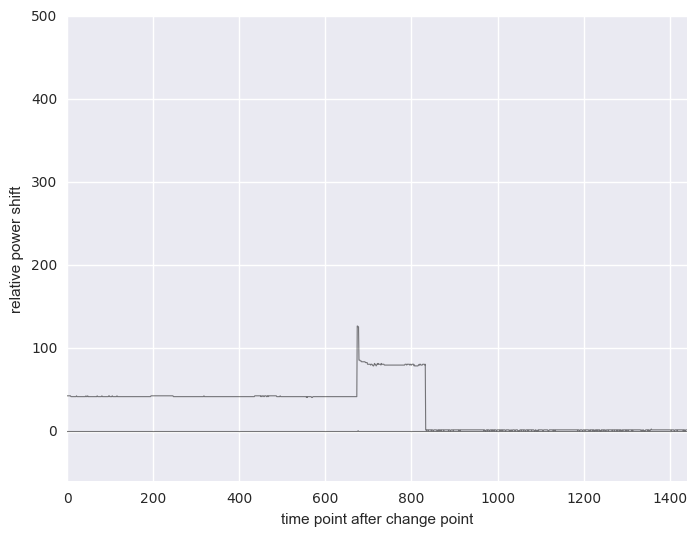

In [236]:
plt.figure(figsize=[8, 6])

for x in ytemp[6:8]:
    plt.plot(x, 'k-', linewidth=.8, alpha=.5)

plt.xlabel('time point after change point')
plt.ylabel('relative power shift')
plt.xlim([0, 1440])
plt.ylim([-60, 500])

(-60, 3000)

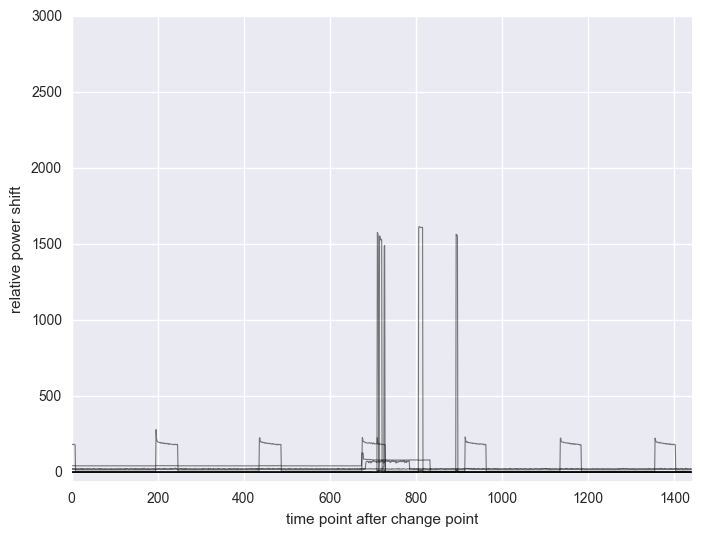

In [146]:
plt.figure(figsize=[8, 6])

for x in ytemp[0:11]:
    plt.plot(x, 'k-', linewidth=.8, alpha=.5)

plt.xlabel('time point after change point')
plt.ylabel('relative power shift')
plt.xlim([0, 1440])
plt.ylim([-60, 3000])

(-60, 2500)

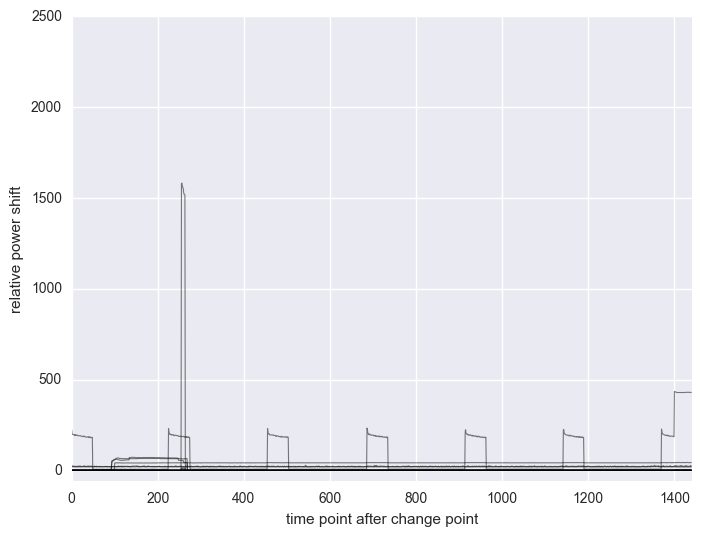

In [65]:
plt.figure(figsize=[8, 6])

for x in ytemp:
    plt.plot(x, 'k-', linewidth=.8, alpha=.5)

plt.xlabel('time point after change point')
plt.ylabel('relative power shift')
plt.xlim([0, 1440])
plt.ylim([-60, 2500])

In [29]:
# app No  /  power
# 1            0 
# 2            0
# 3            250
# 4            1100
# 5            0
# 6            20
# 7            40 spurious 
# 8            500
# 9            1500
# 10           1600
# 11           0
# 12           0
# 13           1100
# 14           1500
# 15           50
# 16           0
# 17           0

In [32]:
#list_of_shapes = [shape1, shape2, shap3]
#mapping variable=[[[appliance_id_1_1, appliance_id_1_2, appliance_id_1_3], [appliance_id_2_1, appliance_id_2_2, appliance_id_2_3], [appliance_id_3_1, appliance_id_3_2]]]
#appliance_list


def construct_obs_mat(list_of_shapes,mapping_variable,appliance_list):
    obs_mat = []
    for i in range(len(appliance_list)):
        row = [0 for jj in range(len(list_of_shapes))]
        for k in mapping_variable[i]:
            row[k-1] = 1
        obs_mat.append(row)
    return obs_mat


def wrapped_integrated_dissagregate(y_all,appliance_list,mapping_variable,power_usage,list_of_shapes,period = 1440,day = 65):
    predicted_profile = integrated_dissagregate(y_all,period,list_of_shapes,day = day,n_equipment_type = len(appliance_list),n_equipment=[2 for i in range(1,len(appliance_list)+1)],obs_mat=construct_obs_mat(list_of_shapes,mapping_variable,appliance_list),power_usage = power_usage)
    toreturn = {}
    for i in range(len(appliance_list)):
        toreturn[appliance_list[i]] = predicted_profile[i]
    toreturn['other'] = predicted_profile[-1]
    return toreturn





[{(1, 1, 1, 0, 0): 0.0, (0, 0, -1, 0, -1): 0.0, (1, 0, 1, 1, 0): 0.0, (0, 0, 0, -1, 0): 0.0, (1, 1, 0, 1, 1): 0.0, (0, -1, -1, -1, -1): 0.0, (0, -1, 0, -1, 0): 0.0, (0, 0, 1, 1, 1): 0.0, (-1, 0, -1, -1, 0): 0.0, (-1, -1, -1, 0, -1): 0.0, (1, 0, 0, 0, 0): 0.0, (0, -1, 0, 0, -1): 0.0, (0, 0, 0, 0, 1): 0.0, (1, 0, 1, 0, 0): 0.0, (0, 0, -1, 0, 0): 0.0, (1, 1, 1, 1, 0): 0.0, (0, 1, 0, 1, 1): 0.0, (1, 0, 0, 1, 0): 0.0, (0, 0, -1, -1, -1): 0.0, (-1, -1, -1, 0, 0): 0.0, (-1, -1, -1, -1, 0): 0.0, (0, 0, 1, 0, 0): 1.3840397434822229e-81, (-1, 0, 0, 0, 0): 0.0, (-1, -1, 0, -1, -1): 0.0, (0, 1, 1, 1, 0): 0.0, (-1, 0, -1, 0, -1): 0.0, (0, 1, 0, 0, 0): 0.0, (1, 1, 1, 0, 1): 0.0, (0, 1, 0, 1, 0): 0.0, (1, 0, 1, 1, 1): 0.0, (0, 0, 0, 0, -1): 0.0, (-1, 0, 0, -1, -1): 0.0, (1, 1, 0, 1, 0): 0.0, (-1, 0, -1, 0, 0): 0.0, (1, 1, 0, 0, 0): 0.0, (0, -1, -1, -1, 0): 0.0, (-1, -1, -1, -1, -1): 0.0, (-1, 0, 0, 0, -1): 0.0, (1, 0, 1, 0, 1): 0.0, (0, 0, 0, 0, 0): 0.0, (0, 1, 1, 0, 0): 0.0, (-1, -1, 0, -1, 0): 0.0,

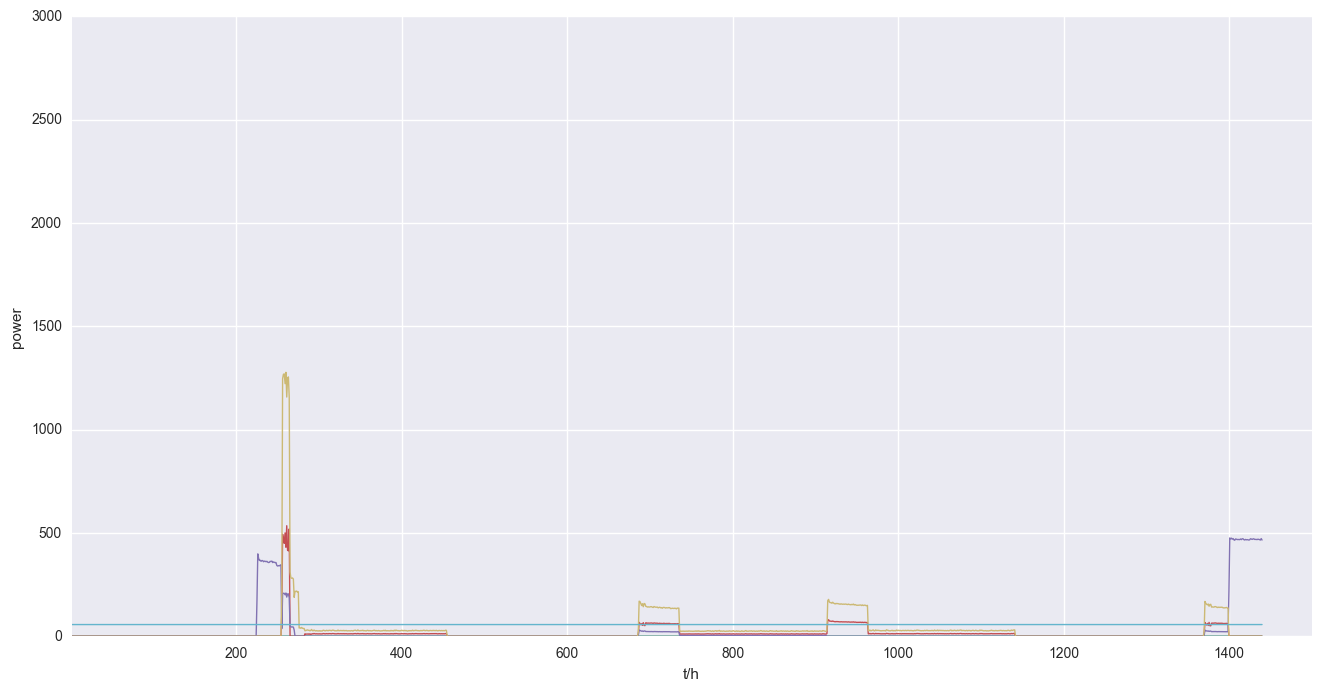

In [75]:
reload(bcp)
list_of_shapes = cluster_mean_2
appliance_list = [1,2,3,4,5]
mapping_variable = [[1],[2],[3],[4],[5]] # in this case this is  a one-to-one mapping
power_usage = [i.mean() for i in cluster_mean_2] # you need to have the information about the power usage for each appliances
predicted_profile = wrapped_integrated_dissagregate(y_all,appliance_list,mapping_variable,power_usage,list_of_shapes,period = 1440,day = 67)
plot_dissagregation_2(predicted_profile,np.array([i+1 for i in range(period)]))




In [62]:
[dutu[np.argpartition(np.array(dutu),int(len(dutu)/50))[int(len(dutu)/50)]] for _ in range(len(dutu))]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [54]:
dutu = [1,2,3,4,5,6,7,8,9,10]

In [72]:
construct_obs_mat(list_of_shapes,mapping_variable,appliance_list)

[[1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1]]

In [81]:
aa = []
for key,value in predicted_profile.iteritems():
    aa.append(value)

In [ ]:
a = [1,2,3,4,5,6]